In [1]:
# exmple1: L1 Penalty and Sparsity in Logistic Regression
# 同样参数下，L2的X矩阵会比L1的X矩阵更稀疏

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
digits = datasets.load_digits()

In [4]:
X,y=digits.data,digits.target

In [5]:
X = StandardScaler().fit_transform(X)
# sklearn.preprocessing.StandardScaler:通过删除均值和缩放到单位方差来标准化特征
# 如果各个特征不像或多或少看起来像标准的正态分布数据（例如，具有0均值和单位方差的高斯），它们可能表现得很糟糕。
# 通过传递with_mean = False，该缩放器也可以应用于稀疏CSR或CSC矩阵，以避免破坏数据的稀疏结构。

In [6]:
y=(y>4).astype(np.int)
# 把大于4的y设为1，其余为0

In [32]:
np.mean(coef_l1_LR==0)

0.84375

C=1.00
Sparsity with L1 penalty:6.25%
score with L1 penalty:0.9093
Spqrsity with L2 penalty:4.69%
score with L2 penalty:0.9043
C=0.10
Sparsity with L1 penalty:26.56%
score with L1 penalty:0.9009
Spqrsity with L2 penalty:4.69%
score with L2 penalty:0.9021
C=0.01
Sparsity with L1 penalty:84.38%
score with L1 penalty:0.8614
Spqrsity with L2 penalty:4.69%
score with L2 penalty:0.8898


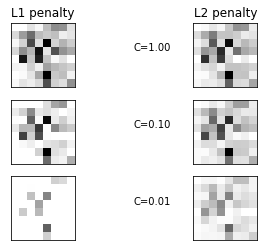

In [8]:
for i,C in enumerate((1,0.1,0.01)):
    clf_l1_LR=LogisticRegression(C=C,penalty='l1',tol=0.01,solver='saga')
    clf_l2_LR=LogisticRegression(C=C,penalty='l2',tol=0.01,solver='saga')
    clf_l1_LR.fit(X,y)
    clf_l2_LR.fit(X,y)
    
    coef_l1_LR=clf_l1_LR.coef_.ravel()
    coef_l2_LR=clf_l2_LR.coef_.ravel()
#     返回一个连续的扁平数组
    
    sparsity_l1_LR=np.mean(coef_l1_LR==0) * 100
    sparsity_l2_LR=np.mean(coef_l2_LR==0) * 100
    
    print('C=%.2f' % C)
    print('Sparsity with L1 penalty:%.2f%%' % sparsity_l1_LR)
    print('score with L1 penalty:%.4f' % clf_l1_LR.score(X,y))
    print('Spqrsity with L2 penalty:%.2f%%' % sparsity_l2_LR)
    print('score with L2 penalty:%.4f' % clf_l2_LR.score(X,y))
    
    l1_plot=plt.subplot(3,2,2*i + 1)
    l2_plot=plt.subplot(3,2,2*(i+1))
    
    if i == 0:
        l1_plot.set_title('L1 penalty')
        l2_plot.set_title('L2 penalty')
        
    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8,8)),interpolation='nearest',cmap='binary',vmax=1,vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8,8)),interpolation='nearest',cmap='binary',vmax=1,vmin=0)
    plt.text(-8,3,'C=%.2f' % C)
    
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    
plt.show()

In [34]:
# example2:Regularization path of L1-Logistic Regression

In [35]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

In [43]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [44]:
X=X[y != 2]
y=y[y != 2]

X /= X.max()
# 把X转换为[0,1]之间的值

In [45]:
cs = l1_min_c(X,y,loss='log') * np.logspace(0,7,16)
# np.logspace：返回在对数刻度上均匀间隔的数字,以10为底？

In [69]:
cs

array([1.00143062e-01, 2.93283433e-01, 8.58922931e-01, 2.51547997e+00,
       7.36694675e+00, 2.15751686e+01, 6.31860002e+01, 1.85049336e+02,
       5.41943732e+02, 1.58716056e+03, 4.64822916e+03, 1.36130111e+04,
       3.98676709e+04, 1.16758238e+05, 3.41943378e+05, 1.00143062e+06])

In [61]:
print('computing regularization path...')
start=time()
clf = linear_model.LogisticRegression(penalty='l1',solver='saga',tol=1e-6,max_iter=int(1e6),warm_start=True)
coefs_=[]
for c in cs:
    clf.set_params(C=c)
    clf.fit(X,y)
    coefs_.append(clf.coef_.ravel().copy())
print('this book %0.3fs' % (time()-start))

computing regularization path...
this book 4.578s


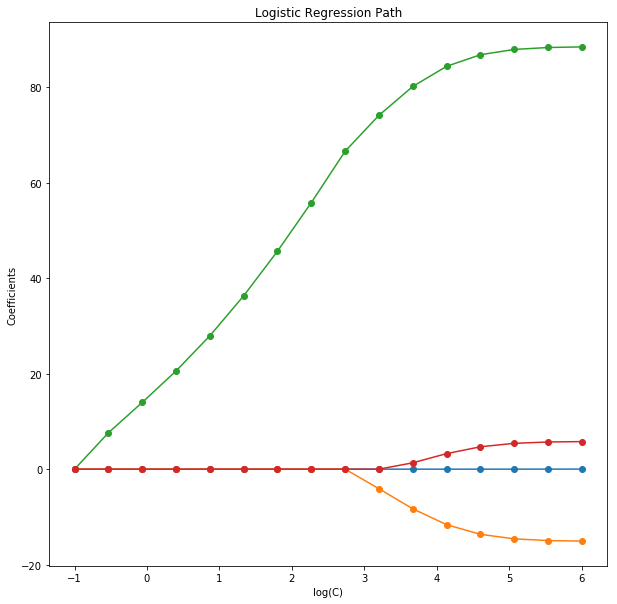

In [72]:
coefs_=np.array(coefs_)
plt.figure(figsize=(10,10))
plt.plot(np.log10(cs),coefs_,marker='o')
ymin,ymax=plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

In [90]:
# example3:Plot multinomial and One-vs-Rest Logistic Regression

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [117]:
centers=[[-5,0],[0,1.5],[5,-1]]
X,y=make_blobs(n_samples=1000,centers=centers,random_state=40)
transformation=[[0.4,0.2],[-0.4,1.2]]
X=np.dot(X,transformation)

training score:0.995(multinomial)
training score:0.976(ovr)


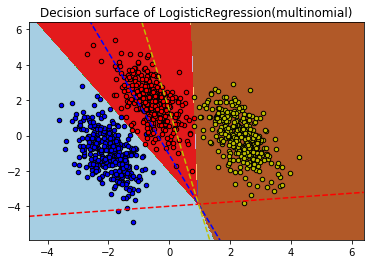

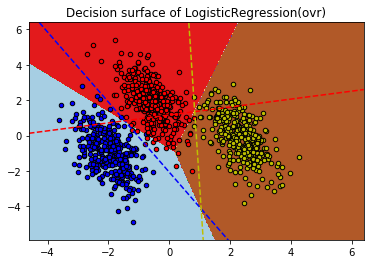

In [119]:
for multi_class in ('multinomial','ovr'):
    clf=LogisticRegression(solver='sag',max_iter=100,random_state=42,multi_class=multi_class).fit(X,y)
    
    print('training score:%.3f(%s)' % (clf.score(X,y),multi_class))
    
    h=0.02  #步长
    x_min,x_max = X[:,0].min() -1,X[:,0].max() +1
    y_min,y_max = X[:,1].min() -1,X[:,1].max() +1
    xx,yy = np.meshgrid(np.arange(x_min,y_max,h),np.arange(y_min,y_max,h))
#     np.meshgrid:把矩阵X变成了矩阵z的行向量，y变成了矩阵s的列向量
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired)
    plt.title('Decision surface of LogisticRegression(%s)' % multi_class)
    plt.axis('tight')
    
    colors='bry'
    for i,color in zip(clf.classes_,colors):
        idx = np.where(y==i)
        plt.scatter(X[idx,0],X[idx,1],c=color,cmap=plt.cm.Paired,edgecolor='black',s=20)
        
    xmin,xmax=plt.xlim()
    ymin,ymax=plt.ylim()
    coef=clf.coef_
    intercept=clf.intercept_
    
    def plot_hyperplane(c,color):
        def line(x0):
            return (-(x0 * coef[c,0]) - intercept[c]) / coef[c,1]
        plt.plot([xmin,xmax],[line(xmin),line(xmax)],ls='--',color=color)
    
    for i,color in zip(clf.classes_,colors):
        plot_hyperplane(i,color)

plt.show()    

In [136]:
# example4:Multiclass sparse logistic regression on newgroups20

In [139]:
import time
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

dataset 20newsgroup,tarin_samples=9000,n_features=130107,n_classes=20
[model]=One versus Rest,solver=saga] Number of epochs:1


C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[model]=One versus Rest,solver=saga] Number of epochs:3
Test accuracy for model ovr: 0.7410
% non-zero coefficients for model ovr,per class: 
 1
Run time (3 epochs) for model ovr:3.24
[model]=Multinomial,solver=saga] Number of epochs:1
[model]=Multinomial,solver=saga] Number of epochs:3
[model]=Multinomial,solver=saga] Number of epochs:7
Test accuracy for model multinomial: 0.7450
% non-zero coefficients for model multinomial,per class: 
 1
Run time (7 epochs) for model multinomial:3.53
Examplej run in 11.710 s


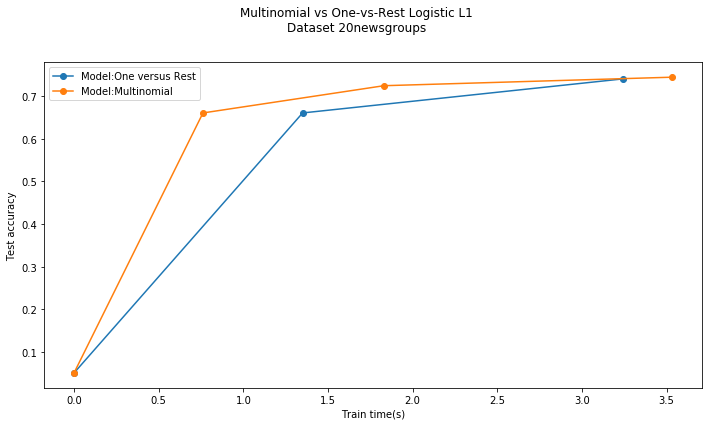

In [146]:
t0=time.clock()
solver='saga'
n_samples=10000

datasets=fetch_20newsgroups_vectorized('all')
X=datasets.data
y=datasets.target
X=X[:n_samples]
y=y[:n_samples]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.1)
train_samples,n_features=X_train.shape
n_classes=np.unique(y).shape[0]

print('dataset 20newsgroup,tarin_samples=%i,n_features=%i,n_classes=%i' % (train_samples,n_features,n_classes))

models={'ovr':{'name':'One versus Rest','iters':[1,3]},
       'multinomial':{'name':'Multinomial','iters':[1,3,7]}}

for model in models:
    accuracies=[1/n_classes]
    times=[0]
    densities=[1]
    
    model_params=models[model]
    
    for this_max_iter in model_params['iters']:
        print('[model]=%s,solver=%s] Number of epochs:%s' % (model_params['name'],solver,this_max_iter))
        lr = LogisticRegression(solver=solver,multi_class=model,C=1,penalty='l1',fit_intercept=True,
                                max_iter=this_max_iter,random_state=42)
        t1=time.clock()
        lr.fit(X_train,y_train)
        train_time = time.clock()-t1
        
        y_pred=lr.predict(X_test)
        accuracy=np.sum(y_pred==y_test)/y_test.shape[0]
        density=np.mean(lr.coef_!=0,axis=1) * 100
        accuracies.append(accuracy)
        times.append(train_time)
    models[model]['times']=times
    models[model]['densities']=densities
    models[model]['accuracies']=accuracies
    print('Test accuracy for model %s: %.4f' % (model,accuracies[-1]))
    print('%% non-zero coefficients for model %s,'
          'per class: \n %s' % (model,densities[-1]))
    print('Run time (%i epochs) for model %s:'
         '%.2f' % (model_params['iters'][-1],model,times[-1]))
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

for model in models:
    name=models[model]['name']
    times=models[model]['times']
    accuracies=models[model]['accuracies']
    ax.plot(times,accuracies,marker='o',label='Model:%s' % name)
    ax.set_xlabel('Train time(s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
            'Dataset %s' % '20newsgroups')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time=time.clock() - t0
print('Examplej run in %.3f s' % run_time)
plt.show()

In [148]:
# example5:mnist classification using multinomial logistic + L1

In [13]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

Sparsity with L1 penalty: 79.67%
Test score with L1 penalty: 0.8247
Example run in 45.831 s


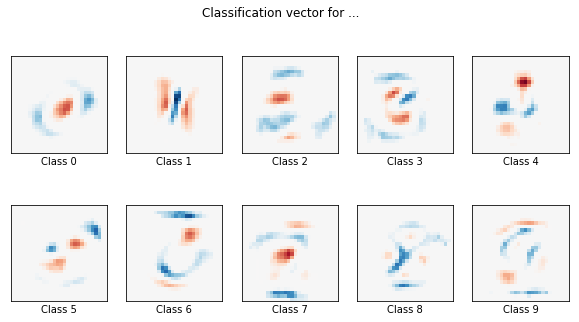

In [42]:
t0 = time.time()
train_samples=5000

(X,y)=fetch_openml('mnist_784',version=1,return_X_y=True)

random_state=check_random_state(0)
permutation=random_state.permutation(X.shape[0])
X=X[permutation]
y=y[permutation]
X2=X.reshape((X.shape[0],-1))

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=train_samples,test_size=10000)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

clf=LogisticRegression(C=50/train_samples,multi_class='multinomial',penalty='l1',solver='saga',tol=0.1)
clf.fit(X_train,y_train)
sparsity=np.mean(clf.coef_==0) * 100
score=clf.score(X_test,y_test)
print('Sparsity with L1 penalty: %.2f%%' % sparsity)
print('Test score with L1 penalty: %.4f' % score)

coef=clf.coef_.copy()
plt.figure(figsize=(10,5))
scale=np.abs(coef).max()
for i in range(10):
    l1_plot=plt.subplot(2,5,i+1)
    l1_plot.imshow(coef[i].reshape(28,28),interpolation='nearest',cmap=plt.cm.RdBu,vmin=-scale,vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for ...')

run_time=time.time()-t0
print('Example run in %.3f s' % run_time)
plt.show()